In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [78]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [79]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [80]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [81]:
df.IsActiveMember.values

array([1, 1, 0, ..., 1, 0, 0], dtype=int64)

(array([[219., 569., 560., 524., 500., 506., 499., 535., 519., 720.],
        [194., 466., 488., 485., 489., 506., 468., 493., 506., 754.]]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 2 BarContainer objects>)

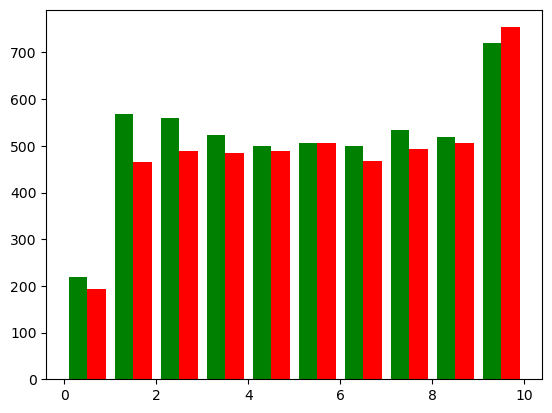

In [82]:
tenure_churn_no=df[df.IsActiveMember==0].Tenure
tenure_churn_yes=df[df.IsActiveMember==1].Tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'],)

In [83]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

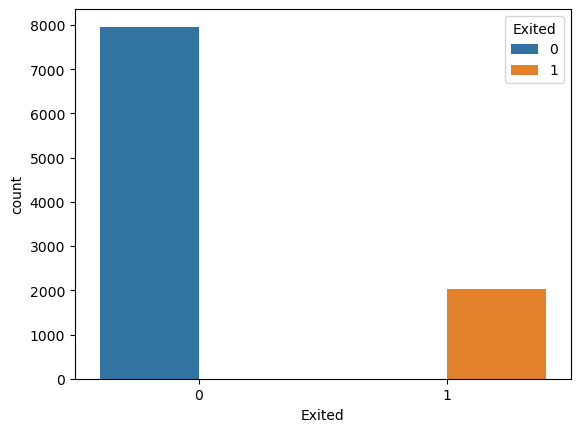

In [84]:
sns.countplot(x='Exited',hue='Exited',data=df)

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
df.drop('CustomerId', axis=1, inplace=True)

In [87]:
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_18400\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_18400\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_18400\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype==np.number:
C:\Users\GAURI KET\AppData\Local\Temp\ipykernel_18400\1696928730.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column

In [88]:
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1115,228,0,0,24,2,0.00,0,1,1,101348.88,1
1,1,1177,217,2,0,23,1,83807.86,0,0,1,112542.58,0
2,2,2040,111,0,0,24,8,159660.80,2,1,0,113931.57,1
3,3,289,308,0,0,21,1,0.00,1,0,0,93826.63,0
4,4,1822,459,2,0,25,2,125510.82,0,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1999,380,0,1,21,5,0.00,1,1,0,96270.64,0
9996,9996,1336,125,0,1,17,10,57369.61,0,1,1,101699.77,0
9997,9997,1570,318,0,0,18,7,0.00,0,0,1,42085.58,1
9998,9998,2345,381,1,1,24,3,75075.31,1,1,0,92888.52,1


In [89]:
X=df.drop('Exited',axis=1)

In [90]:
y=df.Exited

In [91]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [92]:
X_feature=ss.fit_transform(X)

In [93]:
X_feature

array([[-1.73187761, -0.46418322, -0.32733113, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-1.7315312 , -0.3909112 , -0.44133106, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.73118479,  0.62898807, -1.53987591, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 1.73118479,  0.07353887,  0.60539563, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.7315312 ,  0.98943914,  1.25830436, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.73187761,  1.4692527 ,  1.46557697, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X_feature,y,test_size=0.2,random_state=1)

In [96]:
import tensorflow as tf

from tensorflow import keras
from keras.layers import Dense
from keras import utils
import seaborn

In [106]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [107]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [108]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                260       
                                                                 
 dense_7 (Dense)             (None, 15)                315       
                                                                 
 dense_8 (Dense)             (None, 1)                 16        
                                                                 
Total params: 591
Trainable params: 591
Non-trainable params: 0
_________________________________________________________________


In [109]:
Xtrain.shape

(8000, 12)

In [110]:
ytrain.shape

(8000,)

In [111]:
model.fit(Xtrain,ytrain,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7249
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.8095
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8232
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8344
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3793 - accuracy: 0.8429
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3700 - accuracy: 0.8464
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3646 - accuracy: 0.8478
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3615 - accuracy: 0.8494
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8511
Epoch 10/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3573 - accura

250/250 [==============================] - 1s 3ms/step - loss: 0.3132 - accuracy: 0.8704
Epoch 82/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8717
Epoch 83/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3119 - accuracy: 0.8710
Epoch 84/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3115 - accuracy: 0.8727
Epoch 85/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3125 - accuracy: 0.8731
Epoch 86/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8708
Epoch 87/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8715
Epoch 88/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3111 - accuracy: 0.8726
Epoch 89/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3112 - accuracy: 0.8727
Epoch 90/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3106 - accuracy: 

In [114]:
score=model.evaluate(Xtest,ytest)
score[1]

63/63 [==============================] - 0s 3ms/step - loss: 0.3529 - accuracy: 0.8555


0.8554999828338623